In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
# CSV 파일 읽기
df_customer = pd.read_csv('/content/drive/MyDrive/프로그래머스DA/최종 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/Customer_info.csv')
df_discount = pd.read_csv('/content/drive/MyDrive/프로그래머스DA/최종 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/Discount_info.csv')
df_marketing = pd.read_csv('/content/drive/MyDrive/프로그래머스DA/최종 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/Marketing_info.csv')
df_onlinesales = pd.read_csv('/content/drive/MyDrive/프로그래머스DA/최종 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/Onlinesales_info.csv')
df_tax = pd.read_csv('/content/drive/MyDrive/프로그래머스DA/최종 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/Tax_info.csv')
df_rfm = pd.read_csv('/content/drive/MyDrive/프로그래머스DA/최종 프로젝트/이커머스 고객 세분화 분석 아이디어 경진대회/rfm.csv')

In [4]:
df_rfm.describe()

,Recency,Frequency,Monetary
count,1468.000000,1468.000000,1468.000000
mean,145.292234,36.051771,2964.310792
std,101.936959,50.885680,4738.500782
min,1.000000,1.000000,0.900000
25%,56.000000,10.000000,600.364500
50%,132.000000,21.000000,1620.267000
75%,221.000000,46.000000,3684.641500
max,365.000000,695.000000,73054.822000


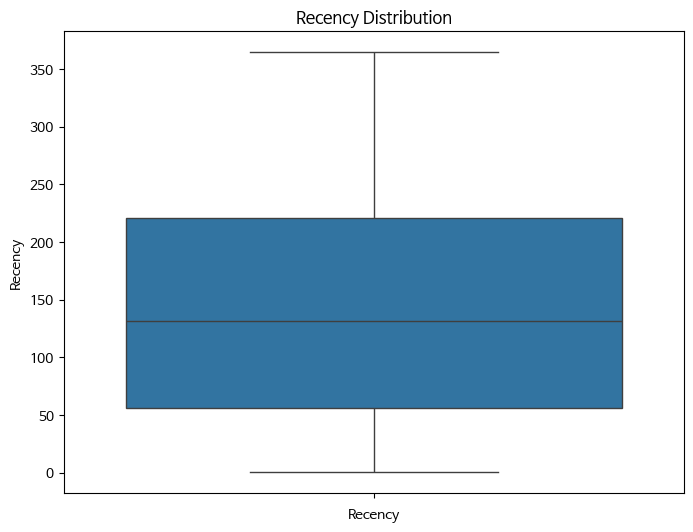

In [5]:
# 상자 수염 그림 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.boxplot(data=df_rfm['Recency'])  # 상자 수염 그림 그리기
plt.title('Recency Distribution')  # 그래프 제목 설정
plt.xlabel('Recency')  # x축 라벨 설정
plt.show()  # 그래프 출력

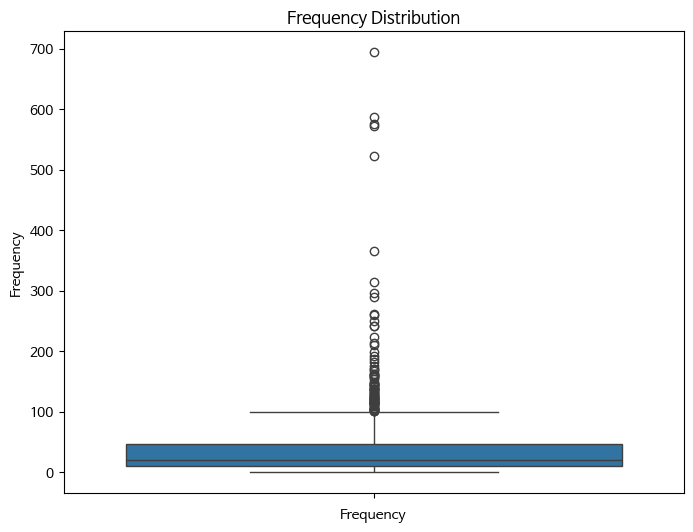

In [6]:
# 상자 수염 그림 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.boxplot(data=df_rfm['Frequency'])  # 상자 수염 그림 그리기
plt.title('Frequency Distribution')  # 그래프 제목 설정
plt.xlabel('Frequency')  # x축 라벨 설정
plt.show()  # 그래프 출력

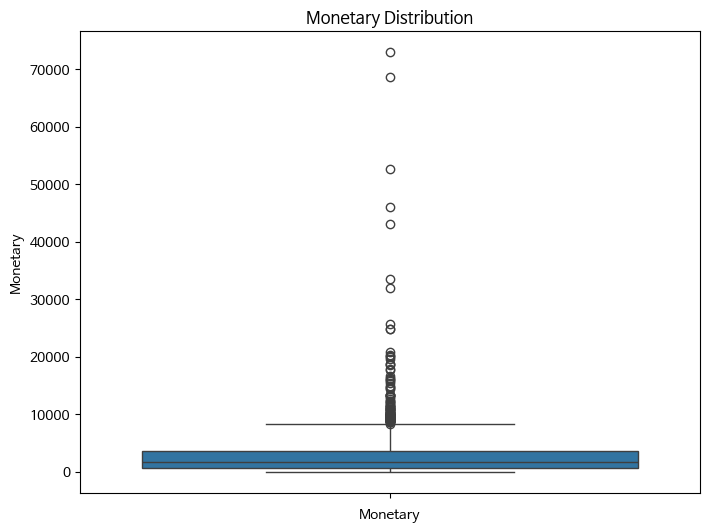

In [7]:
# 상자 수염 그림 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.boxplot(data=df_rfm['Monetary'])  # 상자 수염 그림 그리기
plt.title('Monetary Distribution')  # 그래프 제목 설정
plt.xlabel('Monetary')  # x축 라벨 설정
plt.show()  # 그래프 출력

In [8]:
df_rfm.head(20)

,고객ID,Recency,Frequency,Monetary
0,USER_0000,108,2,21.693
1,USER_0001,60,60,13053.352
2,USER_0002,74,23,1311.415
3,USER_0003,18,17,1207.853
4,USER_0004,108,36,1235.722
5,USER_0005,131,16,594.352
6,USER_0006,190,91,6636.091
7,USER_0007,25,14,440.821
8,USER_0008,41,77,9612.159
9,USER_0009,100,69,4741.927


#이상치 개수 구하기
Recency는 이상치가 존재하지 않는다.

In [9]:
# Q1과 Q3 계산
q1 = df_rfm['Frequency'].quantile(0.25)
q3 = df_rfm['Frequency'].quantile(0.75)

print(q1, q3)

# IQR 계산
iqr = q3 - q1

# 이상치 상한치 계산
upper_bound_f = q3 + 1.5 * iqr

# 이상치 개수 계산
outliers_count = df_rfm[df_rfm['Frequency'] > upper_bound_f]['Frequency'].count()

print("Frequency 이상치 개수:", outliers_count)

10.0 46.0
Frequency 이상치 개수: 92


In [10]:
# Q1과 Q3 계산
q1 = df_rfm['Monetary'].quantile(0.25)
q3 = df_rfm['Monetary'].quantile(0.75)

print(q1, q3)

# IQR 계산
iqr = q3 - q1

# 이상치 상한치 계산
upper_bound_m = q3 + 1.5 * iqr

# 이상치 개수 계산
outliers_count = df_rfm[df_rfm['Monetary'] > upper_bound_m]['Monetary'].count()

print("Monetary 이상치 개수:", outliers_count)

600.3645 3684.6414999999997
Monetary 이상치 개수: 101


In [11]:
# 이상치가 아닌 값들의 개수 계산
non_outliers_count = df_rfm[df_rfm['Frequency'] <= upper_bound_m].shape[0]

print("이상치가 아닌 값들의 개수:", non_outliers_count)

이상치가 아닌 값들의 개수: 1468


In [12]:
df_rfm2 = df_rfm.drop('고객ID', axis=1)
df_rfm2

,Recency,Frequency,Monetary
0,108,2,21.693
1,60,60,13053.352
2,74,23,1311.415
3,18,17,1207.853
4,108,36,1235.722
...,...,...,...
1463,271,7,533.150
1464,88,40,2132.738
1465,195,8,97.997
1466,70,1,298.000


# Recency
##값을 나눔
###r_qcut: R을 1부터 4까지 값을 나눔(값이 클수록 R값이 크다)

In [13]:
# r_qcut
r_labels = list(range(1, 5, 1))
r_qcut = pd.qcut(x=df_rfm['Recency'], q = 4, labels = r_labels)

r_qcut.value_counts()

r_qcut

0       2
1       2
2       2
3       1
4       2
       ..
1463    4
1464    2
1465    3
1466    2
1467    2
Name: Recency, Length: 1468, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [14]:
# # r_qcut2
# r_labels = list(range(1, 3, 1))
# r_qcut2 = pd.qcut(x=df_rfm['Recency'], q = 2, labels = r_labels)

# r_qcut2.value_counts()

# r_qcut2

In [15]:
# # r_qcut_1, r_qcut_2, r_qcut_3, r_qcut_4

# r_qcut_1 = []
# r_qcut_2 = []
# r_qcut_3 = []
# r_qcut_4 = []

# # 각 변수를 해당하는 사분위수로 나누기
# quantiles = df_rfm['Recency'].quantile([0.25, 0.5, 0.75]).tolist()

# # 새로운 데이터프레임에 각 사분위수에 해당하는 값을 할당하여 해당하는 부분에 값을 넣어줌
# for i, value in enumerate(df_rfm['Recency']):
#     if value <= quantiles[0]:
#         r_qcut_1.append(value)
#     elif value <= quantiles[1]:
#         r_qcut_2.append(value)
#     elif value <= quantiles[2]:
#         r_qcut_3.append(value)
#     else:
#         r_qcut_4.append(value)

# # 결과 확인
# print(r_qcut_1)
# print(r_qcut_2)
# print(r_qcut_3)
# print(r_qcut_4)

# print(len(r_qcut_1 + r_qcut_2 + r_qcut_3 + r_qcut_4))

#Frequency
##f_qcut: 구간을 나눠 rfm값에 해당하는 값 부여(변수의 마지막 숫자가 클수록 F값이 크다)


In [16]:
# f_qcut

f_labels = list(range(1, 5, 1))
f_qcut = pd.qcut(x=df_rfm['Frequency'], q = 4, labels = f_labels)

f_qcut.value_counts()

f_qcut

0       1
1       4
2       3
3       2
4       3
       ..
1463    1
1464    3
1465    1
1466    1
1467    4
Name: Frequency, Length: 1468, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [17]:
# # f_2_1, f_2_2

# f_2_1 = []
# f_2_2 = []

# # 새로운 데이터프레임에 각 사분위수에 해당하는 값을 할당하여 해당하는 부분에 값을 넣어줌
# for i, value in enumerate(df_rfm['Frequency']):
#     if value <= upper_bound_f:
#         f_2_1.append(value)
#     else:
#         f_2_2.append(value)

# # 결과 확인
# print(f_2_1)
# print(f_2_2)

# print(len(f_2_1 + f_2_2))

#Monetary
##m_qcut: 구간을 나눠 rfm값에 해당하는 값 부여(변수의 마지막 숫자가 클수록 M값이 크다)

In [18]:
# f_qcut

m_labels = list(range(1, 5, 1))
m_qcut = pd.qcut(x=df_rfm['Monetary'], q = 4, labels = m_labels)

m_qcut.value_counts()

m_qcut

0       1
1       4
2       2
3       2
4       2
       ..
1463    1
1464    3
1465    1
1466    1
1467    4
Name: Monetary, Length: 1468, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [19]:
# # m_2_1, m_2_2

# m_2_1 = []
# m_2_2 = []

# # 새로운 데이터프레임에 각 사분위수에 해당하는 값을 할당하여 해당하는 부분에 값을 넣어줌
# for i, value in enumerate(df_rfm['Monetary']):
#     if value <= upper_bound_m:
#         m_2_1.append(value)
#     else:
#         m_2_2.append(value)

# # 결과 확인
# print(m_2_1)
# print(m_2_2)

# print(len(m_2_1 + m_2_2))

In [20]:
print(r_qcut.value_counts())
print(f_qcut.value_counts())
print(m_qcut.value_counts())
print()
print(len(r_qcut))
print(len(f_qcut))
print(len(m_qcut))

2    372
1    369
4    366
3    361
Name: Recency, dtype: int64
1    396
4    361
3    359
2    352
Name: Frequency, dtype: int64
1    367
2    367
3    367
4    367
Name: Monetary, dtype: int64

1468
1468
1468


--------------------------------------------------------------------------------

In [21]:
# r_qcut, Frequency, Monetary 열을 포함한 데이터프레임 생성
rfm = pd.concat([r_qcut, f_qcut, m_qcut], axis=1)

rfm

,Recency,Frequency,Monetary
0,2,1,1
1,2,4,4
2,2,3,2
3,1,2,2
4,2,3,2
...,...,...,...
1463,4,1,1
1464,2,3,3
1465,3,1,1
1466,2,1,1


### DBSCAN의 파라미터 값

In [22]:
dbscan = DBSCAN(eps=110, min_samples=10)

In [23]:
dbscan.fit(df_rfm2)

DBSCAN(eps=110, min_samples=10)

In [24]:
# 클러스터 레이블 확인
cluster_labels = dbscan.labels_

np.set_printoptions(threshold=sys.maxsize)

# 클러스터링 결과 확인
print("클러스터 레이블:", cluster_labels)

클러스터 레이블: [ 0 -1  0  0  0  0 -1  0 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  2 -1  0  0  0 -1  0  0 -1 -1 -1  0  0  0 -1  0 -1  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0 -1  2  0  0  0  0  0  0
  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1 -1
 -1  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0 -1  0  0  0  0 -1  0 -1  0
  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0 -1  0  0  0
  0  0  0  2  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0 -1  0  0  0  0  0  0  0  0
  0 -1  0  0  0 -1  0  0 -1  0 -1  0  0 -1  0  0  0 -1  0  0  0  0 -1  0
  0  0  0  0 -1  0  0  0  0  0 -1 -1  0  0  0  0  1  0 -1  0  0  0  2  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0
 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  

<ipython-input-25-f427962a9290>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_rfm['Recency'], cluster_rfm['Frequency'], cluster_rfm['Monetary'], c=color, label=label_text)


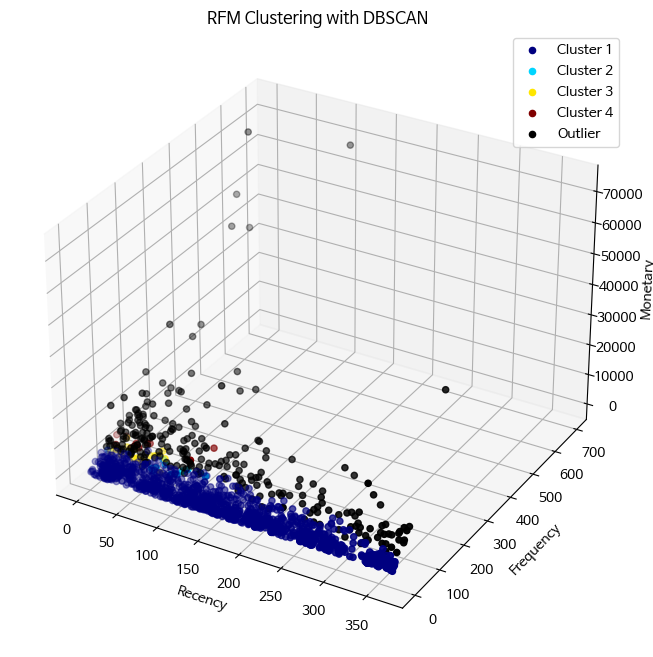

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 클러스터 레이블에 따라 데이터 포인트를 색상별로 그래프에 추가
for label in set(cluster_labels):
    if label == -1:
        # 이상치는 검은색으로 표시
        color = 'k'
        label_text = 'Outlier'
    else:
        # 다른 클러스터는 랜덤한 색상으로 표시
        color = plt.cm.jet(label / max(cluster_labels))
        label_text = f'Cluster {label + 1}'

    # 클러스터에 속한 데이터 포인트의 인덱스
    cluster_index = cluster_labels == label

    # 해당 클러스터에 속한 데이터 포인트의 RFM 스코어
    cluster_rfm = df_rfm2[cluster_index]

    # 3차원 공간에서 데이터 포인트를 그래프에 추가
    ax.scatter(cluster_rfm['Recency'], cluster_rfm['Frequency'], cluster_rfm['Monetary'], c=color, label=label_text)

# 그래프 축과 레이블 설정
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('RFM Clustering with DBSCAN')

# 그래프 출력
plt.legend()
plt.show()


#DBSCAN의 특성상 이상치 값을 해결하기 어려워 보인다.

In [26]:
# df_fm = df_rfm[['Frequency', 'Monetary']]
df_rfm2
# rfm

# DBSCAN 모델 생성 및 파라미터 탐색
eps_values = [i for i in range(100, 250)]  # 1부터 200까지 1 간격의 값
min_samples_values = range(10, 26)  # 5부터 15까지의 값


best_score = -1
best_params = {'eps': None, 'min_samples': None}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_rfm2)

        if len(set(labels)) > 1:  # At least 2 clusters should be formed
            silhouette_avg = silhouette_score(df_rfm2, labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

# 최적 파라미터와 실루엣 점수 출력
print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)

# 최적 파라미터로 클러스터링 수행
best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
best_labels = best_dbscan.fit_predict(df_rfm2)

Best Silhouette Score: 0.7495805357611489
Best Parameters: {'eps': 226, 'min_samples': 21}


In [27]:
dbscan = DBSCAN(eps=226, min_samples=21)

In [28]:
dbscan.fit(rfm)

DBSCAN(eps=226, min_samples=21)

In [29]:
# 클러스터 레이블 확인
cluster_labels = dbscan.labels_

np.set_printoptions(threshold=sys.maxsize)

# 클러스터링 결과 확인
print("클러스터 레이블:", cluster_labels)

클러스터 레이블: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 

<ipython-input-30-6891d131311e>:16: RuntimeWarning: invalid value encountered in scalar divide
  color = plt.cm.jet(label / max(best_labels))
<ipython-input-30-6891d131311e>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df_rfm2['Recency'], df_rfm2['Frequency'], df_rfm2['Monetary'], c=color, label=label_text)


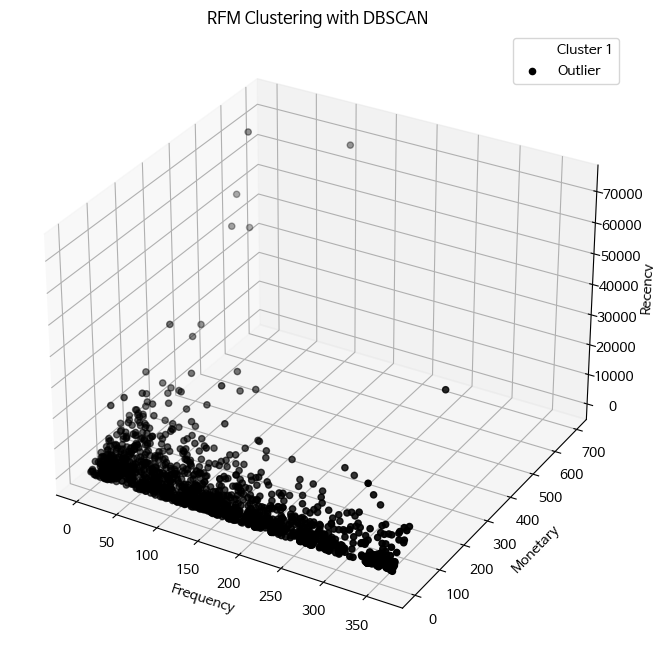

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 클러스터 레이블에 따라 데이터 포인트를 색상별로 그래프에 추가
for label in set(best_labels):
    if label == -1:
        # 이상치는 검은색으로 표시
        color = 'k'
        label_text = 'Outlier'
    else:
        # 다른 클러스터는 랜덤한 색상으로 표시
        color = plt.cm.jet(label / max(best_labels))
        label_text = f'Cluster {label + 1}'

    # 클러스터에 속한 데이터 포인트의 인덱스
    cluster_index = best_labels == label

    # 해당 클러스터에 속한 데이터 포인트의 RFM 스코어
    cluster_rfm = df_rfm2[cluster_index]

    # 3차원 공간에서 데이터 포인트를 그래프에 추가
    ax.scatter(df_rfm2['Recency'], df_rfm2['Frequency'], df_rfm2['Monetary'], c=color, label=label_text)

# 그래프 축과 레이블 설정
ax.set_xlabel('Frequency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Recency')
ax.set_title('RFM Clustering with DBSCAN')

# 그래프 출력
plt.legend()
plt.show()
